In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Diretório com suas imagens
data_dir = 'C:/Users/estel/Documents/Python_Codes/breast_cancer/preprocessed/images/'

# Lista para armazenar imagens e rótulos
images = []
labels = []

# Loop sobre os arquivos no diretório
for filename in os.listdir(data_dir):
    if filename.endswith('.png'):  # Supondo que suas imagens tenham extensão .jpg
        img = load_img(os.path.join(data_dir, filename), target_size=(300, 300))
        img_array = img_to_array(img)
        images.append(img_array)
        
        # Extrair rótulo do nome do arquivo
        label = filename.split(' ')[0]  # Pega o rótulo antes do espaço em branco
        labels.append(label)

In [3]:
# Codificar rótulos em números
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Converter para array numpy
images = np.array(images)
labels = to_categorical(labels)

In [4]:
# Dividir os dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, shuffle=True, random_state=42)

# Carregar o modelo VGG-16 pré-treinado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Congelar as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Adicionar camadas personalizadas
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes: benign, malign, normal

# Compilar o modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 485s 23s/step - accuracy: 0.4933 - loss: 26.9794 - val_accuracy: 0.7628 - val_loss: 3.3071
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 410s 21s/step - accuracy: 0.8404 - loss: 2.1632 - val_accuracy: 0.7500 - val_loss: 2.8131
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 580s 30s/step - accuracy: 0.9005 - loss: 0.6281 - val_accuracy: 0.7756 - val_loss: 2.0404
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 334s 16s/step - accuracy: 0.9254 - loss: 0.3419 - val_accuracy: 0.7692 - val_loss: 1.0587
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 307s 15s/step - accuracy: 0.9566 - loss: 0.1184 - val_accuracy: 0.7885 - val_loss: 1.1898
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 296s 15s/step - accuracy: 0.9523 - loss: 0.1577 - val_accuracy: 0.8077 - val_loss: 1.2725
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 315s 16s/step - accuracy: 0.9660 - loss: 0.0932 - val_accuracy: 0.7692 - val_loss: 1.1854
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 322s 16s/step - accuracy: 0.9667 - loss: 0.1068 - val_accuracy: 0

In [7]:
# Avaliar o desempenho do modelo
loss, accuracy = model.evaluate(X_val, y_val)
print("Loss:", loss)
print("Accuracy:", accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 58s 11s/step - accuracy: 0.8108 - loss: 0.9542
Loss: 0.950028657913208
Accuracy: 0.8205128312110901


In [8]:
# Fazer previsões no conjunto de validação
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 62s 12s/step


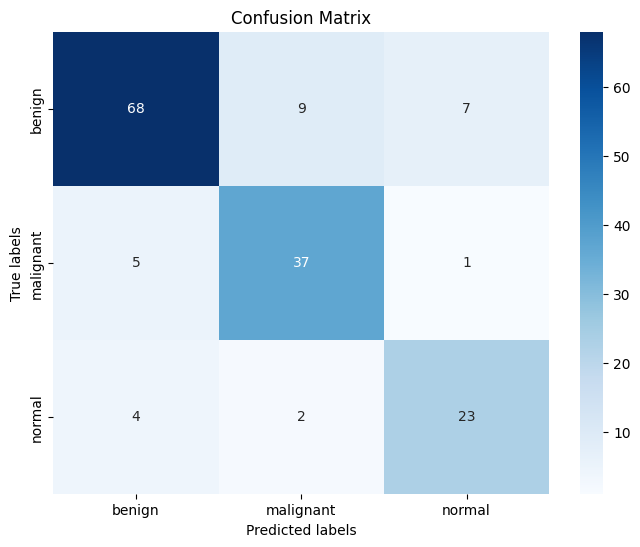

In [9]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()